# Random Forest Regression

Random forest is an ensemble learning method that creates decision trees on randomly selected data samples and selects the best solution through voting. This template trains and tunes a random forest model for a **regression** problem (i.e., predicting continuous values). It also evaluates and visualizes feature importance from a resulting model. If you would like to learn more about random forests, take a look at DataCamp's [Machine Learning with Tree-Based Models in Python](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python) course.

To swap in your dataset in this template, the following is required:
- There are at least two feature columns and a column with a continuous target variable you would like to predict.
- The features have been cleaned and preprocessed, including categorical encoding.
- There are no NaN/NA values. You can use [this template to impute missing values](https://app.datacamp.com/workspace/templates/recipe-python-impute-missing-data) if needed.

The placeholder dataset in this template consists of bike sharing demand data with details, such as date and weather. Each row represents an hour of a day and how many bikes were rented (the target variable). You can find more information on this dataset's source and dictionary [here](https://app.datacamp.com/workspace/datasets/dataset-python-bike-sharing-demand).

### 1. Loading packages and data

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Load the data and replace with your CSV file path
df = pd.read_csv("data/SeoulBikeData.csv")

In [2]:
# Check if there are any null values
print(df.isnull().sum())

Rented Bike Count            0
Hour                         0
Temperature(C)               0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Month                        0
Week                         0
Dayofweek                    0
dtype: int64


In [3]:
# Check columns to make sure you have features and a target variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(C)             8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Month                      8760 non-null   int64  
 12  Week                       8760 non-null   int64  
 13  Dayofweek                  8760 non-null   int64

### 2. Splitting the data
To split the data, we'll use the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. 

In [4]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df.iloc[:, 1:]  # Specify at least one column as a feature
y = df["Rented Bike Count"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6132, 13), (2628, 13), (6132,), (2628,))

### 3. Building a random forest regressor

The following code builds a scikit-learn `RandomForestRegressor` using the most fundamental parameters. As a reminder, you can learn more about these parameters in DataCamp's [Machine Learning with Tree-Based Models in Python](https://app.datacamp.com/learn/courses/machine-learning-with-tree-based-models-in-python) course and [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [5]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 100,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 4,  # Min number of samples required to split a node
    "min_samples_leaf": 2,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a RandomForestRegressor object with the parameters above
rf = RandomForestRegressor(**params)

# Train the random forest on the train set
rf = rf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = rf.predict(X_test)

To evaluate this regressor, there are several error metrics we can use. The cole below prints the mean absolute error, mean squared error, and root mean squared error. To learn more about how these are calculated and the other error metrics available, take a look at scikit-learn's [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). In the end, you'll have to decide which error metric is best suited for your problem.

In [6]:
# Evaluate performance with error metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 170.41104617621622
Mean Squared Error: 81216.53542349092
Root Mean Squared Error: 284.9851494788648


### 4. Evaluating feature importance

In `RandomForestRegressor`, there is a property called [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_) which holds the Gini importance of each feature (the higher this value, the more important the feature). We can list and plot `feature_importances_` to see which features influence predictions most.

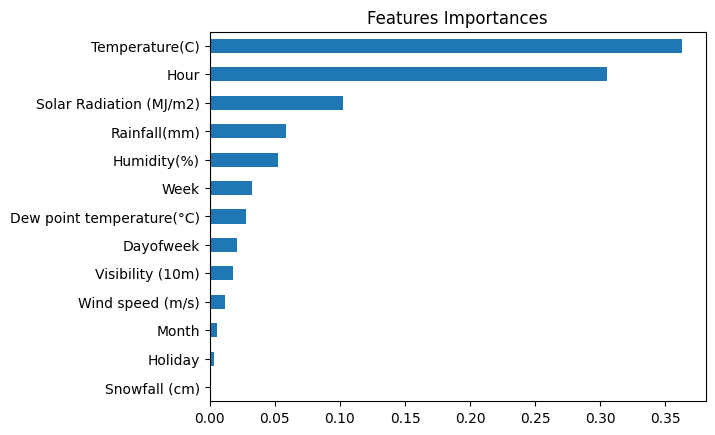

In [7]:
# Create a sorted Series of features importances
importances_sorted = pd.Series(
    data=rf.feature_importances_, index=X_train.columns
).sort_values()

# Plot a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh")
plt.title("Features Importances")
plt.show()

### 5. Hyperparameter tuning with random search

Hyperparameter tuning is considered best practice to improve the efficiency and effectiveness of your machine learning model. In this section, we'll use random search where a fixed number of hyperparameter settings is sampled from specified probability distributions. To learn more about other hyperparameter tuning options, such as grid search, check out DataCamp's [Hyperparameter Tuning in Python](https://app.datacamp.com/learn/courses/hyperparameter-tuning-in-python) course.

In [8]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "n_estimators": list((range(20, 200))),
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=123)

# Instantiate RandomizedSearchCV() with rf and the parameter grid
rf_rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    scoring="neg_mean_absolute_error",  # Metric to evaluate performance
    random_state=123
)

# Train the model on the training set
rf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", rf_rs.best_params_)
print("Best performance: ", rf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   1.0s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   1.0s
[CV] END ccp_alpha=0, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   1.0s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   1.2s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   1.2s
[CV] END ccp_alpha=0.001, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=150; total time=   1.2s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   1.4s
[CV] END ccp_alpha=0, max_depth=11, min_samples_leaf=1, min_samples_split=4, n_estimators=110; total time=   1.4s
[CV] END ccp_alpha=0,